In [62]:
from heapq import merge
from idlelib.iomenu import encoding

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib import font_manager, rc


In [63]:
 # 1) 공공의료기관 현황 데이터에서 주소를 추출하고 주소에서 시도, 군구를 추출한다. 0402 하청빈
 #  2) 전체 데이터 1차, 2차 데이터를 추출한다. 0402 하청빈
data = pd.read_csv("공공보건의료기관현황.csv", index_col=0, encoding="utf-8", engine="python")
address_list = data['주소']
data['1차주소'] = address_list.str.split().str[0]
data['2차주소'] = address_list.str.split().str[1]
data.loc[data['1차주소'] == "경남",['1차주소']] = "경상남도"
data.loc[data['1차주소'] == "서울시",['1차주소']] = "서울특별시"
data.loc[data['1차주소'] == "경북",['1차주소']] = "경상북도"
data.loc[data['1차주소'] == "충북",['1차주소']] = "충청북도"
data.loc[data['1차주소'] == "충남",['1차주소']] = "충청남도"
data.loc[data['1차주소'] == "전남",['1차주소']] = "전라남도"
data.loc[data['1차주소'] == "경기",['1차주소']] = "경기도"
data.loc[data['1차주소'] == "전북",['1차주소']] = "전라북도"
data.loc[data['1차주소'] == "부산특별시",['1차주소']] = "부산광역시"
data.loc[data['1차주소'] == "대전시",['1차주소']] = "대전광역시"
data.loc[data['1차주소'] == "전라북도",['1차주소']] = "전북특별자치도"
data.loc[data['1차주소'] == "강원도",['1차주소']] = "강원특별자치도"
# 천안, 창원->특례시, 경산
data.loc[data['1차주소'] == "천안시",['1차주소','2차주소']] = ["충청남도","천안시"]
data.loc[data['1차주소'] == "창원시",['1차주소','2차주소']] = ["경상남도","창원특례시"]
data.loc[data['1차주소'] == "경산시",['1차주소','2차주소']] = ["경상북도","경산시"]
# print(address['1차주소'].value_counts())
data.loc[data['2차주소'] == "창원시",['2차주소']] = "창원특례시"
data.loc[data['2차주소'] == "아란13길",['2차주소']] = "제주시"
data

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고,1차주소,2차주소
연번,,,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN,강원특별자치도,춘천시
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN,강원특별자치도,삼척시
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN,강원특별자치도,영월군
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN,강원특별자치도,원주시
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN,강원특별자치도,강릉시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,청풍호노인사랑병원,시군구립,제천시 노인전문병원 설치및 운영에 관한 조례,충청북도,해당없음,33280576,요양병원,187,27207,충청북도 제천시 금성면 청풍호로 1147,www.cplove.co.kr,043-646-0808,043-648-5827,NaN,충청북도,제천시
217,충주시 노인전문병원,시군구립,충주시노인전문병원설치 및 운영에관한 조례,충청북도,해당없음,33280088,요양병원,300,27442,충청북도 충주시 동량면 대전리 1686-28,www.hyolife.com,043-855-9393,043-855-8866,NaN,충청북도,충주시
218,충청북도 충주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,충청북도,해당없음,33100063,종합병원,292,27468,충청북도 충주시 안림로 239-50(안림동 134),www.cjmct.or.kr,043-871-0114,043-843-4231,NaN,충청북도,충주시


In [64]:
 # 3) 각 지역별 의료기관 수를 구한다. 0402 하청빈
gungu_count = data.groupby('2차주소')['병원 명'].count().reset_index()
sdgg_count = gungu_count.merge(data[['2차주소','1차주소']],on='2차주소',how='left')
sdgg_count.rename(columns={'병원 명':'병원 수'},inplace=True)
sdgg_count

,2차주소,병원 수,1차주소
0,가평군,1,경기도
1,강남구,2,서울특별시
2,강남구,2,서울특별시
3,강동구,1,서울특별시
4,강릉시,4,강원특별자치도
...,...,...,...
222,홍성군,2,충청남도
223,홍천군,1,강원특별자치도
224,화성시,1,경기도
225,화순군,2,전라남도


In [65]:
 #  4) 행정구역의 시도, 군구별 인구수를 추출한다. 0402 하청빈
population = pd.read_excel('행정구역_시군구_별__성별_인구수.xlsx')
gungu_population = population[population['행정구역(시군구)별'] != population['행정구역(시군구)별'].apply(lambda x: x.strip())]
gungu_population.rename(columns={"행정구역(시군구)별" : "2차주소"}, inplace=True)
gungu_population.rename(columns={"2025.01":"인구"}, inplace=True)
gungu_population['2차주소'] = gungu_population['2차주소'].apply(lambda x: x.strip())
gungu_population.loc[gungu_population['2차주소'] == '창원시',['2차주소']] = "창원특례시"
gungu_population.drop(columns=gungu_population.columns[2:4], axis=1, inplace=True)
sdgg_population_merged_data = pd.merge(sdgg_count,gungu_population,on='2차주소', how='left')
sdgg_population_merged_data.dropna(inplace=True)
sdgg_population_merged_data.drop_duplicates('2차주소',inplace=True)
sdgg_population_merged_data

C:\Users\it\Desktop\Yuu_Yur_Python_workspace\statistics_analysis_visualization_practice\.venv1\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\it\AppData\Local\Temp\ipykernel_1396\2440029793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gungu_population.rename(columns={"행정구역(시군구)별" : "2차주소"}, inplace=True)
C:\Users\it\AppData\Local\Temp\ipykernel_1396\2440029793.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gungu_population.rename(columns={"2025.01":"

,2차주소,병원 수,1차주소,인구
0,가평군,1,경기도,62472
1,강남구,2,서울특별시,557115
3,강동구,1,서울특별시,484301
4,강릉시,4,강원특별자치도,207543
8,강북구,1,서울특별시,283293
...,...,...,...,...
298,해운대구,2,부산광역시,376213
300,홍성군,2,충청남도,99287
302,홍천군,1,강원특별자치도,66661
303,화성시,1,경기도,971835


In [66]:
 # 5. 각 지역별 인구 비율 공공의로기관수 비율을 구한다. 0402 하청빈
sdgg_population_merged_data['ratio'] = sdgg_population_merged_data.apply(lambda row: round((row['병원 수'] / row['인구'])*1000000,3), axis=1)
sdgg_population_merged_data

,2차주소,병원 수,1차주소,인구,ratio
0,가평군,1,경기도,62472,16.007
1,강남구,2,서울특별시,557115,3.590
3,강동구,1,서울특별시,484301,2.065
4,강릉시,4,강원특별자치도,207543,19.273
8,강북구,1,서울특별시,283293,3.530
...,...,...,...,...,...
298,해운대구,2,부산광역시,376213,5.316
300,홍성군,2,충청남도,99287,20.144
302,홍천군,1,강원특별자치도,66661,15.001
303,화성시,1,경기도,971835,1.029


In [67]:
 # 6. 위의 데이터를 사용하여 블록 map을 작성한다. 0402 하청빈
path = os.getcwd()
data_draw_korea = pd.read_csv(path+"\\data_draw_korea.csv", index_col=0, encoding="utf-8", engine="python")
addr_aliases = {'강원도' :'강원특별자치도', '전라북도':'전북특별자치도', '창원시':'창원특례시'}
data_draw_korea["광역시도"]= data_draw_korea['광역시도'].apply(lambda r: addr_aliases.get(r,r))
data_draw_korea["행정구역"]= data_draw_korea['행정구역'].apply(lambda r: addr_aliases.get(r,r))
sdgg_population_merged_data.rename(columns={'1차주소':'광역시도', '2차주소':'행정구역'},inplace=True)
sdgg_draw_data = pd.merge(data_draw_korea,sdgg_population_merged_data, how='outer', left_index=False, right_index=False)
# draw 데이터와 주소, 병원, ratio 전부 들어간 데이터 sdgg_draw_data
sdgg_draw_data.reset_index(inplace=True)
sdgg_draw_data

,index,인구수,shortName,x,y,면적,광역시도,행정구역,병원 수,인구,ratio
0,0,202520,강릉,11,4,1040.07,강원특별자치도,강릉시,4.0,207543,19.273
1,1,25589,고성(강원),9,0,664.19,강원특별자치도,고성군,NaN,NaN,NaN
2,2,86747,동해,11,5,180.01,강원특별자치도,동해시,1.0,87571,11.419
3,3,63986,삼척,11,8,1185.80,강원특별자치도,삼척시,1.0,61464,16.270
4,4,76733,속초,9,1,105.25,강원특별자치도,속초시,1.0,80754,12.383
...,...,...,...,...,...,...,...,...,...,...,...
224,224,127462,제천,8,10,882.47,충청북도,제천시,1.0,128352,7.791
225,225,34480,증평,6,11,81.84,충청북도,증평군,NaN,NaN,NaN
226,226,62809,진천,5,11,406.08,충청북도,진천군,NaN,NaN,NaN
227,227,790216,청주,6,12,932.51,충청북도,청주시,4.0,854742,4.680


whitelabelmin 전 : 2.5
whitelabelmin 후 : 2.5
vmin 전 : 1.0
vmin 후 : 1.0
vmax 전 : 7.0
vmax 후 : 7.0
mapdata : x    0    1    2    3    4    5    6    7    8    9    10   11   12   13
y                                                                       
0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN
1   NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  2.0  1.0  NaN  NaN  NaN  NaN
2   NaN  NaN  NaN  1.0  4.0  1.0  NaN  1.0  1.0  NaN  NaN  NaN  NaN  NaN
3   NaN  NaN  NaN  NaN  2.0  NaN  4.0  1.0  5.0  1.0  5.0  NaN  NaN  NaN
4   NaN  NaN  1.0  NaN  NaN  NaN  NaN  1.0  2.0  NaN  1.0  4.0  NaN  NaN
5   NaN  NaN  1.0  1.0  1.0  1.0  NaN  1.0  1.0  NaN  NaN  1.0  NaN  NaN
6   NaN  NaN  1.0  2.0  NaN  NaN  1.0  1.0  1.0  1.0  NaN  2.0  NaN  1.0
7   NaN  NaN  NaN  1.0  NaN  NaN  2.0  NaN  NaN  1.0  2.0  1.0  NaN  NaN
8   1.0  2.0  NaN  NaN  1.0  NaN  NaN  2.0  1.0  1.0  1.0  1.0  NaN  NaN
9   NaN  NaN  NaN  NaN  2.0  1.0  1.0  4.0  2.0  NaN  1.0  1.0  2.0  NaN
10  NaN  2.0  2.0 

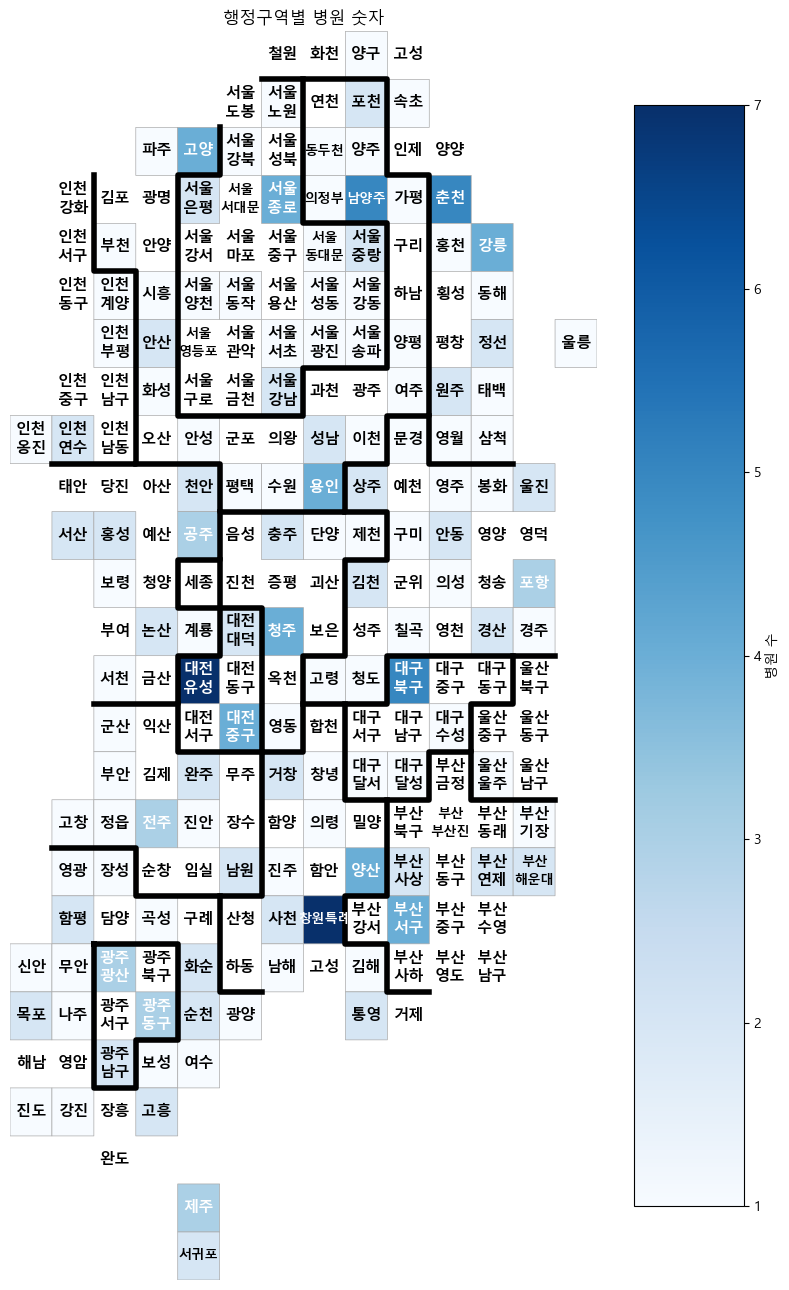

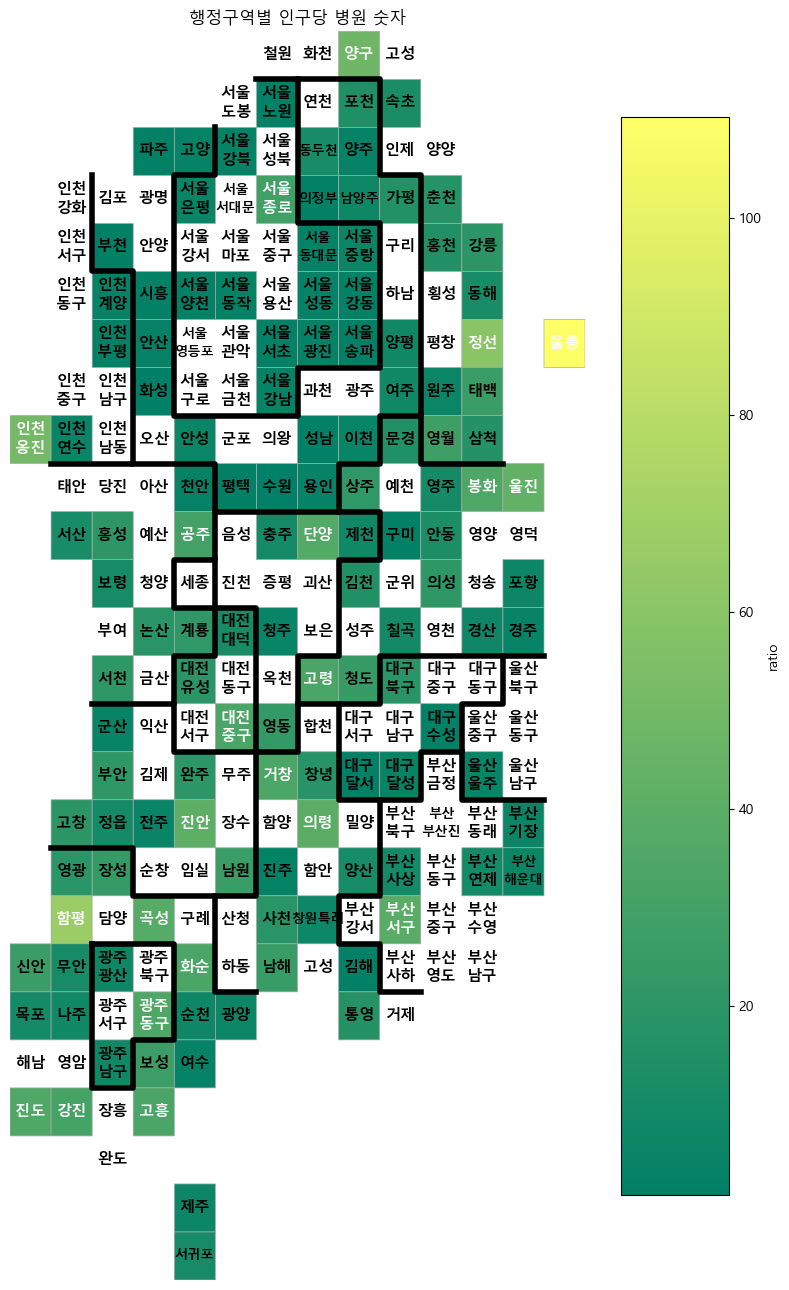

In [68]:
 # 6. 위의 데이터를 사용하여 블록 map을 작성한다. 0402 하청빈
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgunbd.ttf").get_name()
rc("font", family = font_name)
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)],  # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)],  # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)],  # 경기도
    [(9, 12), (9, 10), (8, 10)],  # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)],  # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)],  # 충청북도
    [(14, 4), (15, 4), (15, 6)],  # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)],  # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)],  # 대구시
    [(15, 11), (16, 11), (16, 13)],  # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)],  # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)],  # 광주시
    [(18, 5), (20, 5), (20, 6)],  # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)],  # 부산시
]
def draw_blockMap(blockedMap, targetData, title, color):
  # 블록맥의 각 구역의 색깔을 지정시, 최소 비율 -> 흰색 가까운 임의의 비율 색.
  # 히트맵에서, 연관관계 가 높으면 색깔이 진한색(빨간,파란)
  whitelabelmin = (max(blockedMap[targetData])- min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])
  # test 샘플값
  print(f"whitelabelmin 전 : {whitelabelmin}")
  # whitelabelmin = 2.5
  print(f"whitelabelmin 후 : {whitelabelmin}")

  # 라벨 이름
  datalabel = targetData

  # vmin , vmax , -> 색깔을 표현하기 위한 최소, 최대 값으로 활용할 예정.
  vmin = min(blockedMap[targetData])
  print(f"vmin 전 : {vmin}")
  # vmin = 1.0
  print(f"vmin 후 : {vmin}")
  vmax = max(blockedMap[targetData])
  print(f"vmax 전 : {vmax}")
  # vmax = 7.0
  print(f"vmax 후 : {vmax}")

  # pivot 함수를 이용해서, 기존의 행과 열을 , 새로운 데이터프레임(테이블)로 재배치하는 함수.
  # index = "y" : 행, columns = "x" : 열 , 그 안에 값으로 : targetData
  mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
  print(f"mapdata : {mapdata}")

  # 전처리, NaN 없애기.
  # np.ma.masked_where(각데이터의 NaN의 존재여부 True False 판단, mapdata)
  # np.isnan(mapdata) -> pivot 라는 함수로 새롭게 만들어진 테이블에서, nan 다 조사해서,
  # 그 결과를 True, False 로 다반환,
  # masked_mapdata -> nan 다 제거된 테이블 .
  masked_mapdata = np.ma.masked_where(np.isnan(mapdata),mapdata)
  print(f"masked_mapdata : {masked_mapdata}")

  # 그래프 옵션
  # 8 인치, 13인치.
  plt.figure(figsize=(8,13))
  # 제목은 함수의 인자값으로 들어고 됨.
  plt.title(title)

  # 그래프 색깔. cmap = color -> 인자값으로 받을 예정, 빨간, 파란
  # 블록맵의 각 사각형의 색깔을 지정하는 로직.
  plt.pcolor(masked_mapdata, vmin = vmin , vmax = vmax , cmap = color, edgecolor = "#aaaaaa", linewidth = 0.5)

  #지역 이름표시.
  # 원본 데이터를 반복문을 전체 조회를 해서, 각 지역명을 표기하는 방식
  # idx : 각 행의 인덱스, row : 각 행
  for idx, row in blockedMap.iterrows():
    # 지도에 표시되는 지역명, 주석처리 사용이됨, 옵션 설정.
    annocolr = "white" if row[targetData] > whitelabelmin else "black"

    # 광역시 = 시도, 행정구역 = 군구,
    # 부산 강서구, 서울 강서구,
    # 부산 동구, 서울, 인천 , 동구, 서구 , 중구 , 겹침.
    # 2차지역명으로 만 표기시 중복이 되므로, 1차 지역명과 같이 표기 하는 방법.


    # 부산
    # 서구
    # row["광역시도"][:2], 2 끝 미포함 , 0,1 ex) 부산광역시 -> 부산
    # row["행정구역"][:-1], -1 맨마지막 의미 미포함, 맨마지막 한글자 제외하고 전부
    #  ex) 강릉시 ->  강릉
    # row["행정구역"][-1], 마지막 글자를 의미함.
    #  ex) 강릉시 ->  시
    # ex) 부산광역시 ,
    if row["광역시도"].endswith("시") and not row["광역시도"].startswith("세종"):
      dispname = "{}\n{}".format(row["광역시도"][:2],row["행정구역"][:-1])
      if len(row["행정구역"]) <= 2:
        dispname += row["행정구역"][-1]
    else:
      dispname = row["행정구역"][:-1]

    # 글자 크기 조정하기. 2글자 조금 크게, 3글자 조금 작게 조정하기.
    if len(dispname.splitlines()[-1]) >= 3:
      fontsize, linespacing = 9.5, 1.5
    else:
      fontsize, linespacing = 11, 1.2

    # 주석의 위치 조정 하기. 폰트 크기, 색 설정., 굵기 등.
    plt.annotate(dispname, (row["x"]+0.5, row["y"]+0.5), weight = "bold",fontsize=fontsize, ha="center", va="center", color = annocolr, linespacing=linespacing)

  # 라인의 경계 그리기,
  for path in BORDER_LINES:
    # zip, 같은 인덱스 끼리 묶기,
    # *path, 언패킹, 각각의 변수에 할당.
    ys, xs = zip(*path)
    plt.plot(xs,ys, c = "black", lw=4)
  # gca, get current axe , 현재 축을 선택.
  # y 축 반전하는 함수, invert_yaxis() -> 예) 원래 y로 위로 갈수록 커지는 속성 기본.
  # 반전, y가 커질수로, 아래로 향하게 하는 속성.
  plt.gca().invert_yaxis()
  # x축, y축 표기 여부
  plt.axis("off")
  # 그래프 오른쪽의 각 색깔별 막대 그래프, shrink 크기, aspect 종횡비율, 각구간 범위.
  cb = plt.colorbar(shrink =1 , aspect = 10)
  #
  cb.set_label(datalabel)

  # 내부 요소가 겹치지 않게 그리기.
  plt.tight_layout()
  # 결과 화면, 이미지 파일로 저장하기.
  plt.savefig("./blockMap_"+ targetData + ".png")
  plt.show
draw_blockMap(sdgg_draw_data,"병원 수","행정구역별 병원 숫자", "Blues")
draw_blockMap(sdgg_draw_data,'ratio','행정구역별 인구당 병원 숫자', "summer")